In [128]:
import pandas as pd
import time
from meta_algo import MetaAlgorithm
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import pickle
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import voting_classifier

In [129]:
# show_proportions is only a helper function for plotting
def show_proportions(X, sensitive_features, y_pred, y=None, description="Demographic Parity", plot_row_index=1):
    print("\n" + description)
    plt.figure(plot_row_index)
    plt.title(description)
    plt.ylabel("P[recidivism predicted | conditions]")
    
    indices = {}
    positive_indices = {}
    negative_indices = {}
    recidivism_count = {}
    recidivism_pct = {}
    groups = np.unique(sensitive_features.values)
    n_groups = len(groups)
    max_group_length = max([len(group) for group in groups])
    color = cm.rainbow(np.linspace(0,1,n_groups))
    x_tick_labels_basic = []
    x_tick_labels_by_label = []
    for index, group in enumerate(groups):
        indices[group] = sensitive_features.index[sensitive_features == group]
        recidivism_count[group] = sum(y_pred[indices[group]])
        recidivism_pct[group] = recidivism_count[group]/len(indices[group])
        print("P[recidivism predicted | {}]                {}= {}".format(group, " "*(max_group_length-len(group)), recidivism_pct[group]))
    
        plt.bar(index + 1, recidivism_pct[group], color=color[index])
        x_tick_labels_basic.append(group)
    
        if y is not None:
            positive_indices[group] = sensitive_features.index[(sensitive_features == group) & (y == 1)]
            negative_indices[group] = sensitive_features.index[(sensitive_features == group) & (y == 0)]
            prob_1 = sum(y_pred[positive_indices[group]])/len(positive_indices[group])
            prob_0 = sum(y_pred[negative_indices[group]])/len(negative_indices[group])
            print("P[recidivism predicted | {}, recidivism]    {}= {}".format(group, " "*(max_group_length-len(group)) , prob_1))
            print("P[recidivism predicted | {}, no recidivism] {}= {}".format(group, " "*(max_group_length-len(group)), prob_0))

            plt.bar(n_groups + 1 + 2 * index, prob_1, color=color[index])
            plt.bar(n_groups + 2 + 2 * index, prob_0, color=color[index])
            x_tick_labels_by_label.extend(["{} recidivism".format(group), "{} no recidivism".format(group)])
    
    x_tick_labels = x_tick_labels_basic + x_tick_labels_by_label
    plt.xticks(range(1, len(x_tick_labels)+1), x_tick_labels, rotation=45, horizontalalignment="right")

dataset_used = 'compas'

if(dataset_used == 'compas'):
    compas_train = pd.read_csv('./../../data/compas_train.csv')
    compas_val = pd.read_csv('./../../data/compas_val.csv')
    compas_test = pd.read_csv('./../../data/compas_test.csv')

    y_train = compas_train.pop('two_year_recid') 
    y_test = compas_test.pop('two_year_recid')
    sensitive_features_train = compas_train['race']
    sensitive_features_test = compas_test['race']
    X_train = compas_train
    X_test = compas_test
    
    X_train = X_train.drop('Unnamed: 0', axis=1)
    X_test = X_test.drop('Unnamed: 0', axis=1)
    
    sensitive_features_train = sensitive_features_train.replace(0, 'African-American')
    sensitive_features_train = sensitive_features_train.replace(1, 'Caucasian')
    sensitive_features_test = sensitive_features_test.replace(0, 'African-American')
    sensitive_features_test = sensitive_features_test.replace(1, 'Caucasian')
    
elif(dataset_used == 'adult'):
    adult_train = pd.read_csv('./../../data/adult_train.csv')
    adult_val = pd.read_csv('./../../data/adult_val.csv')
    adult_test = pd.read_csv('./../../data/adult_test.csv')

    y_train = adult_train.pop('Income Binary') 
    y_test = adult_test.pop('Income Binary')
    sensitive_features_train = adult_train['sex']
    sensitive_features_test = adult_test['sex']
    X_train = adult_train
    X_test = adult_test
    
    X_train = X_train.drop('Unnamed: 0', axis=1)
    X_test = X_test.drop('Unnamed: 0', axis=1)
    
    sensitive_features_train = sensitive_features_train.replace(0, 'Female')
    sensitive_features_train = sensitive_features_train.replace(1, 'Male')
    sensitive_features_test = sensitive_features_test.replace(0, 'Female')
    sensitive_features_test = sensitive_features_test.replace(1, 'Male')
    
else:
    print('Invalid dataset_used variable.')

In [108]:
HYPOTHESIS_FILE = "hypotheses_ensemble_2020-04-21_14:10:07.pkl"
ensemble_hyp = pickle.load(open(HYPOTHESIS_FILE, 'rb'))


Demographic Parity
P[recidivism predicted | African-American]                = 0.30864197530864196
P[recidivism predicted | Caucasian]                       = 0.13725490196078433


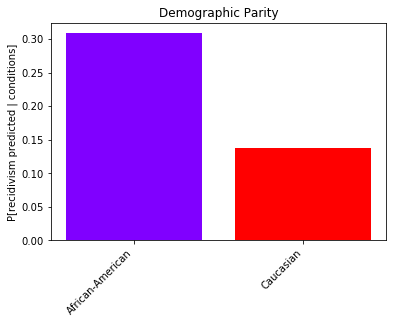

In [110]:
show_proportions(X_test, sensitive_features_test, ensemble_hyp.predict(X_test))

In [111]:
accuracy_score(ensemble_hyp.predict(X_test), y_test)

0.6022727272727273


Demographic Parity
P[recidivism predicted | African-American]                = 0.5123456790123457
P[recidivism predicted | Caucasian]                       = 0.19607843137254902


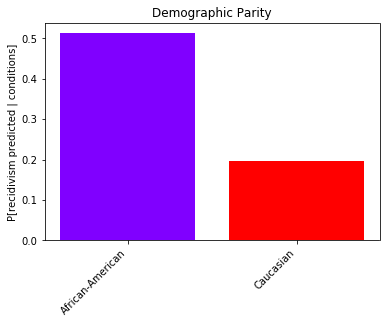

In [112]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
show_proportions(X_test, sensitive_features_test, logreg.predict(X_test))

In [113]:
accuracy_score(logreg.predict(X_test), y_test)

0.6590909090909091

In [114]:
LIST_FILE = "list_hypotheses_2020-04-21_14:10:07.pkl"
list_hyp = pickle.load(open(LIST_FILE, 'rb'))

In [115]:
print(len(list_hyp))

500



Demographic Parity
P[recidivism predicted | African-American]                = 0.30864197530864196
P[recidivism predicted | Caucasian]                       = 0.13725490196078433


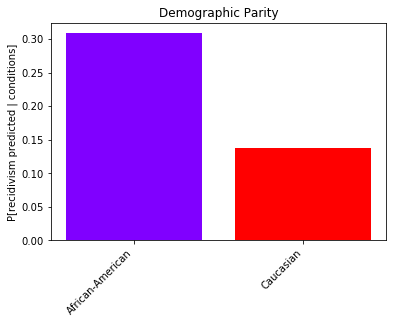

In [121]:
show_proportions(X_test, sensitive_features_test, list_hyp[255].predict(X_test))


Demographic Parity
P[recidivism predicted | African-American]                = 0.0
P[recidivism predicted | Caucasian]                       = 0.0


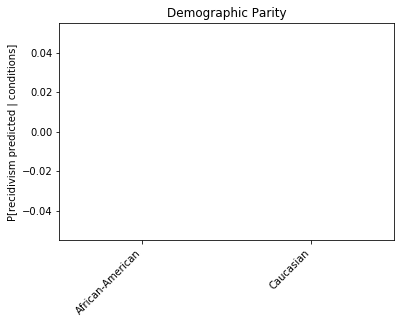

In [127]:
show_proportions(X_test, sensitive_features_test, list_hyp[300].predict(X_test))


Demographic Parity
P[recidivism predicted | African-American]                = 0.2777777777777778
P[recidivism predicted | Caucasian]                       = 0.13725490196078433


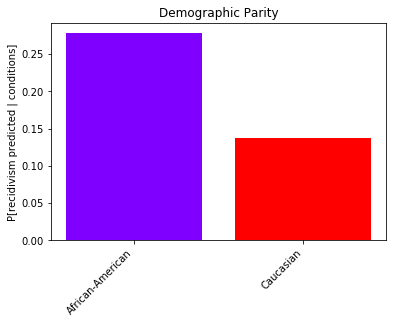

In [74]:
show_proportions(X_test, sensitive_features_test, list_hyp[175].predict(X_test))


Demographic Parity
P[recidivism predicted | African-American]                = 0.30864197530864196
P[recidivism predicted | Caucasian]                       = 0.13725490196078433


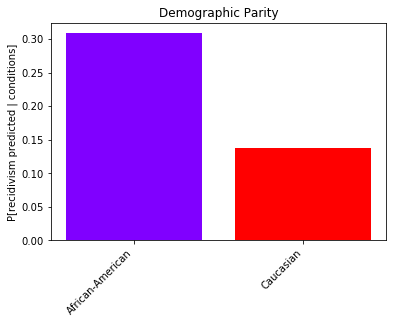

In [75]:
show_proportions(X_test, sensitive_features_test, list_hyp[190].predict(X_test))


Demographic Parity
P[recidivism predicted | African-American]                = 0.2777777777777778
P[recidivism predicted | Caucasian]                       = 0.13725490196078433


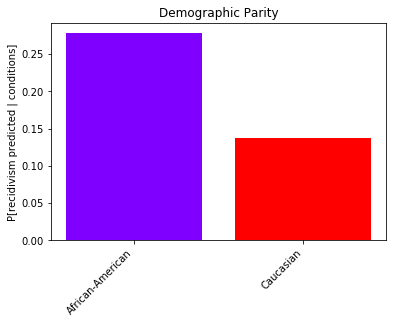

In [83]:
show_proportions(X_test, sensitive_features_test, list_hyp[198].predict(X_test))